In [1]:
%%capture
!pip install matplotlib seaborn pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
sns.set_style("dark")

In [3]:
model_name = "deep_cnn"
root_path = str(os.getcwd()).replace("/notebooks", "")
log_path = os.path.join(root_path, "logs", f"log_{model_name}.csv")
log = pd.read_csv(log_path, sep=";")
log.head()

,train_f1,train_loss,test_f1,test_loss,epoch
0,0.472129,1.433012,0.769357,0.600931,1
1,0.691699,0.875962,0.767932,0.549658,2
2,0.738429,0.747245,0.812872,0.507237,3
3,0.768063,0.685101,0.852322,0.433351,4
4,0.788532,0.631851,0.864462,0.408177,5


In [4]:
new_log = pd.DataFrame()

train_log = log[["train_f1", "train_loss", "epoch"]]
train_log["step"] = ["train"] * train_log.shape[0]
train_log = train_log.rename(columns={"train_f1": "f1", "train_loss": "loss"})

test_log = log[["test_f1", "test_loss", "epoch"]]
test_log["step"] = ["test"] * test_log.shape[0]
test_log = test_log.rename(columns={"test_f1": "f1", "test_loss": "loss"})

new_log = pd.concat([train_log, test_log], axis=0)
del log, train_log, test_log

## Train vs Validation (F1 Score)

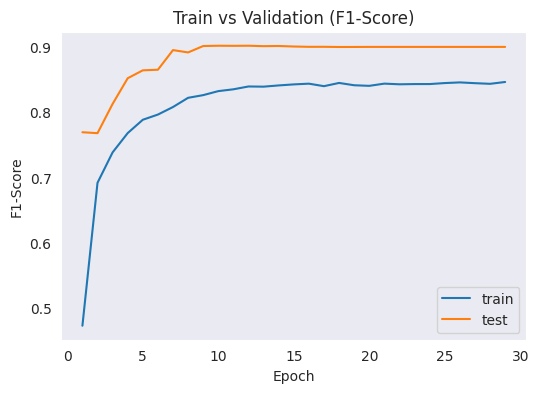

In [5]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=new_log, x="epoch", y="f1", hue="step")
plt.xlabel("Epoch")
plt.ylabel("F1-Score")
plt.title("Train vs Validation (F1-Score)")
plt.legend(loc="best")
plt.show()

## Train vs Validation (Loss)

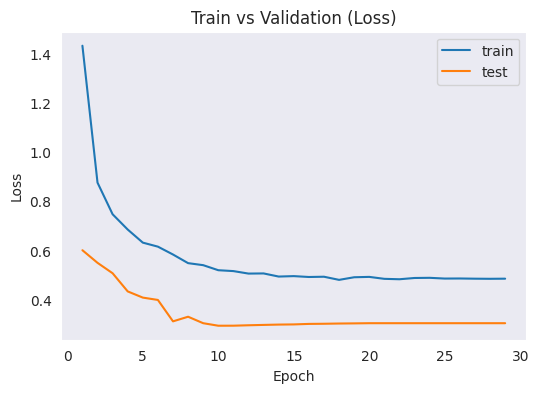

In [6]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=new_log, x="epoch", y="loss", hue="step")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Validation (Loss)")
plt.legend(loc="best")
plt.show()